In [1]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel ('/content/drive/MyDrive/Colab Notebooks/datasets/Base de Vendas Varejo.xlsx')

In [3]:
# Verificando o tipo de dados
df.dtypes

Row ID                             float64
Order ID                           float64
Data da Venda               datetime64[ns]
Prioridade                          object
Quantidade                         float64
Valor da Venda                     float64
Desconto                           float64
Forma de Envio                      object
Lucro                              float64
Preço Unitário                     float64
Custo de Envio                     float64
Nome do Cliente                     object
Cidade                              object
CEP                                float64
Estado                              object
Região                              object
País                                object
Segmento do Cliente                 object
Categoria do Produto                object
Sub-Categoria do Produto            object
Nome do Produto                     object
Embalagem                           object
Margem                             float64
Data de Env

In [4]:
# Extraindo o tempo de envio
df ['Tempo envio'] = df['Data de Envio'] - df['Data da Venda']

In [5]:
df.head()

,Row ID,Order ID,Data da Venda,Prioridade,Quantidade,Valor da Venda,Desconto,Forma de Envio,Lucro,Preço Unitário,...,Região,País,Segmento do Cliente,Categoria do Produto,Sub-Categoria do Produto,Nome do Produto,Embalagem,Margem,Data de Envio,Tempo envio
0,674.0,4706.0,2012-12-28,Não Especificada,30.0,2116.70,0.02,Aéreo Normal,488.818,67.28,...,Nordeste,Brasil,Pequenas Empresas,Material de Escritório,Capas e Acessórios,Catalog Binders with Expanding Posts,Small Box,0.40,2012-12-30,2 days
1,816.0,5891.0,2012-12-28,Média,2.0,44.45,0.01,Aéreo Normal,-17.457,20.98,...,Nordeste,Brasil,Escritório em Casa,Material de Escritório,Capas e Acessórios,Avery Legal 4-Ring Binder,Small Box,0.35,2012-12-30,2 days
2,1876.0,13507.0,2012-12-29,Média,27.0,176.10,0.09,Aéreo Normal,-75.710,6.78,...,Norte,Brasil,Pequenas Empresas,Material de Escritório,Papel,Strathmore Photo Mount Cards,Small Box,0.39,2012-12-30,1 days
3,3583.0,25542.0,2012-12-30,Baixa,37.0,257.46,0.09,Aéreo Rápido,-18.660,7.28,...,Centro-Oeste,Brasil,Escritório em Casa,Material de Escritório,Papel,"Black Print Carbonless 8 1/2"" x 8 1/4"" Rapid M...",Wrap Bag,0.39,2012-12-30,0 days
4,4008.0,28611.0,2012-12-27,Baixa,30.0,15337.58,0.10,Aéreo Normal,6670.409,525.98,...,Sudeste,Brasil,Consumidor,Material de Escritório,Capas e Acessórios,GBC DocuBind 300 Electric Binding Machine,Small Box,0.37,2012-12-30,3 days


In [6]:
# Fortamando os numeros float
pd.set_option ('float_format','{:,.2f}'.format)

In [7]:
# Tempo maximo de atraso
df['Tempo envio'].max()

Timedelta('92 days 00:00:00')

In [8]:
# Procurando em qual estado foi esse atrado
df.groupby ('Estado') ['Tempo envio'].max()

# Chegamos em Pernanbuco sendo o Estado com maior tempo de demora
# Tambem temos uma visualização de quais outros estados diveram picos altos de demora 

Estado
Alagoas                9 days 00:00:00
Amazonas               7 days 01:01:30
Bahia                  9 days 00:00:00
Ceará                  7 days 00:00:00
Distrito Federal       7 days 00:00:00
Espírito Santo         9 days 00:00:00
Goiás                 84 days 00:00:00
Maranhão               7 days 00:00:00
Mato Grosso            9 days 00:00:00
Mato Grosso do Sul    15 days 00:00:00
Minas Gerais           9 days 00:00:00
Paraná                19 days 00:00:00
Paraíba                9 days 00:00:00
Pará                   7 days 00:00:00
Pernambuco            92 days 00:00:00
Piauí                  9 days 00:00:00
Rio Grande do Norte    9 days 00:00:00
Rio Grande do Sul     22 days 00:00:00
Rio de Janeiro         9 days 00:00:00
Santa Catarina        19 days 00:00:00
Sergipe                9 days 00:00:00
São Paulo             31 days 00:00:00
Tocantins              9 days 00:00:00
Name: Tempo envio, dtype: timedelta64[ns]

In [9]:
# Identificar qual estado e região tivemos mais lucro
df.groupby (['Estado','Região']) ['Lucro'].sum()

Estado               Região      
Alagoas              Nordeste        39,829.33
Amazonas             Norte            4,105.47
Bahia                Nordeste        32,868.58
Ceará                Nordeste         3,976.83
Distrito Federal     Centro-Oeste     2,789.60
Espírito Santo       Sudeste         49,640.67
Goiás                Centro-Oeste   319,560.57
Maranhão             Nordeste        24,286.34
Mato Grosso          Centro-Oeste    42,215.90
Mato Grosso do Sul   Centro-Oeste    89,705.51
Minas Gerais         Sudeste         37,783.34
Paraná               Sul            176,052.22
Paraíba              Nordeste        20,386.20
Pará                 Norte            4,264.20
Pernambuco           Nordeste        94,740.39
Piauí                Nordeste        44,182.24
Rio Grande do Norte  Nordeste        23,151.67
Rio Grande do Sul    Sul            136,719.80
Rio de Janeiro       Sudeste         14,399.59
Santa Catarina       Sul            109,735.09
Sergipe              Norde

In [10]:
# Região com menor Lucro
df.groupby ('Região') ['Lucro'].sum()

Região
Centro-Oeste   454,271.57
Nordeste       298,425.81
Norte           28,711.42
Sudeste        317,852.04
Sul            422,507.11
Name: Lucro, dtype: float64

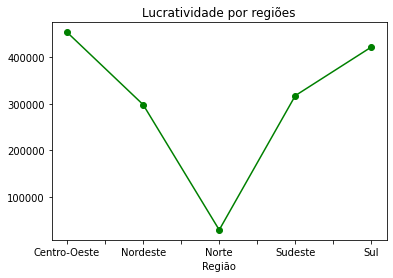

In [11]:
# Grafico
df.groupby('Região')['Lucro'].sum().plot(title = 'Lucratividade por regiões', marker = 'o', color = 'g');

In [12]:
# Estados com menor lucro
df.groupby ('Estado') ['Lucro'].sum()

Estado
Alagoas                39,829.33
Amazonas                4,105.47
Bahia                  32,868.58
Ceará                   3,976.83
Distrito Federal        2,789.60
Espírito Santo         49,640.67
Goiás                 319,560.57
Maranhão               24,286.34
Mato Grosso            42,215.90
Mato Grosso do Sul     89,705.51
Minas Gerais           37,783.34
Paraná                176,052.22
Paraíba                20,386.20
Pará                    4,264.20
Pernambuco             94,740.39
Piauí                  44,182.24
Rio Grande do Norte    23,151.67
Rio Grande do Sul     136,719.80
Rio de Janeiro         14,399.59
Santa Catarina        109,735.09
Sergipe                15,004.22
São Paulo             216,028.44
Tocantins              20,341.75
Name: Lucro, dtype: float64

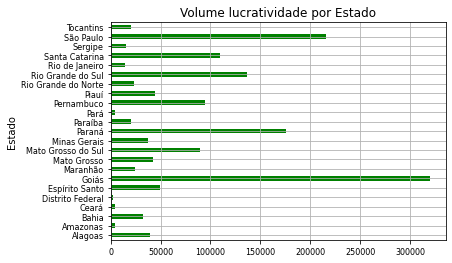

In [13]:
# Gráfico com maior lucratividade
df.groupby ('Estado') ['Lucro'].sum().plot.barh(title = 'Volume lucratividade por Estado', color = 'g', fontsize = 8)
plt.grid ()